In [1]:
from PIL import Image
from matplotlib.pyplot import imshow, show
from matplotlib import cm
from numpy import array
from math import sqrt


Функция, которая реализует преобразование Хаара

In [2]:
def haar_transform(data, length_line, length_column):
    img = data.copy()

    secondary_list = []
    # Преобразовываем строки
    for n in range(0, length_line, 1):
        for m in range(0, length_column, 2):
            x = data[n, m]
            y = data[n, m + 1]
            secondary_list.append((x + y) / sqrt(2))
            secondary_list.append((x - y) / sqrt(2))
        img[n, :] = secondary_list
        secondary_list.clear()

    img_ = img.copy()
    # Преобразовываем столбцы
    for m in range(0, length_column, 1):
        for n in range(0, length_line, 2):
            x = img[n, m]
            y = img[n + 1, m]
            secondary_list.append((x + y) / sqrt(2))
            secondary_list.append((x - y) / sqrt(2))
        img_[:, m] = secondary_list
        secondary_list.clear()

    return img_

Преобразуем матрицы к нужному виду следующей функцией

In [3]:
def sorting_matrix(data, length_line, length_column):
    img = data.copy()

    length_column_ = int(length_column / 2)
    length_line_ = int(length_line / 2)

    # Источник этой части кода - https://habrahabr.ru/post/169615/
    img[0:length_column_, 0:length_line_] = \
        data[0:length_column:2, 0:length_line:2]
    img[length_column_:length_column, 0:length_line_] = \
        data[1:length_column:2, 0:length_line:2]
    img[0:length_column_, length_line_:length_line] = \
        data[0:length_column:2, 1:length_line:2]
    img[length_column_:length_column, length_line_:length_line] = \
        data[1:length_column:2, 1:length_line:2]
    #

    return img

Загружаем изображение

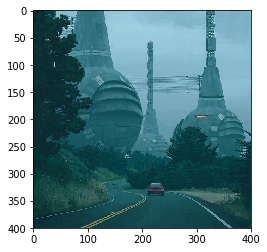

In [5]:
image = Image.open('133.png').convert('RGB')
image = array(image) / 255.0  # Диапазон яркостей — [0, 1]
imshow(image)  # Отобразим на экране
show()

Преобразуем загруженное изображение

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


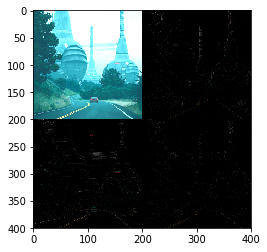

In [8]:
size = image.shape

data_1 = haar_transform(image, size[0], size[1])
data_1 = sorting_matrix(data_1, size[0], size[1])

imshow(data_1, cmap='jet')  # Отобразим на экране
show()

Повторно применим преобразование Хаара

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


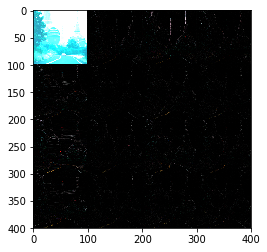

In [9]:
data_2 = haar_transform(data_1, size[0], size[1])
data_2 = sorting_matrix(data_2, size[0], size[1])

imshow(data_2, cmap='jet')  # Отобразим на экране
show()